In [1]:
# Importing our dependencies
from sklearn.model_selection import train_test_split
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
import sklearn as skl
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.datasets import make_regression


#  Import the Baseball csv to show data
import pandas as pd
baseball_df = pd.read_csv("Resources/Batting_Salary.csv")
baseball_df.head()


# This is what we'd do to pull it from the database once that is created
#     import sqlite3
# creating the connection
#    bball = sqlite3.connect('Baseball_Salaries.db')
# read data from SQL to our pandas dataframe that we will use throughout this model.
#   baseball_df = pd.read_sql_query('Select * from Baseball_Salaries;', bball)

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [2]:
#check out the data in our table
baseball_df.head()

,player_id,year,stint,team_id,league_id,g,ab,r,h,double,...,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,aardsda01,2009,1,SEA,AL,73,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,abreubo01,2009,1,LAA,AL,152,563.0,96.0,165.0,29.0,...,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,adamsmi03,2009,1,SDN,NL,37,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,adenhni01,2009,1,LAA,AL,1,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,affelje01,2009,1,SFN,NL,74,2.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [3]:
#exploring the values in the specific columns
baseball_df.nunique()

player_id    1645
year            6
stint           2
team_id        31
league_id       2
g             162
ab            649
r             121
h             211
double         56
triple         17
hr             50
rbi           131
sb             55
cs             21
bb            114
so            190
ibb            30
hbp            26
sh             21
sf             13
g_idp          32
salary       1224
dtype: int64

In [4]:
#reviewing the years included in the dataset

baseball_df.year.value_counts()

2011    812
2012    811
2013    809
2014    796
2010    790
2009    787
Name: year, dtype: int64

<AxesSubplot:xlabel='h', ylabel='salary'>

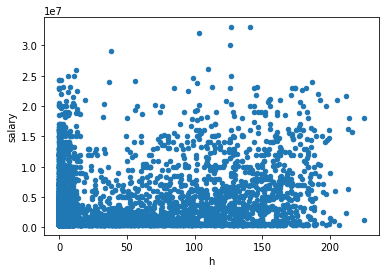

In [5]:
#plotting the hits vs. salary to gain an understanding of the data
baseball_df.plot.scatter('h','salary')

<AxesSubplot:>

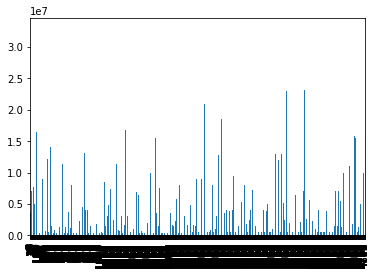

In [6]:
#plotting salary vs player
baseball_df.salary.plot.bar()

In [7]:
#drop columns with insignificant values
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
baseball_df = baseball_df.drop(columns=['player_id','team_id','league_id'])
baseball_df.head()


,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,1,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,1,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,1,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,1,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [8]:
#check datatypes of each column
baseball_df.dtypes

year        int64
stint       int64
g           int64
ab        float64
r         float64
h         float64
double    float64
triple    float64
hr        float64
rbi       float64
sb        float64
cs        float64
bb        float64
so        float64
ibb       float64
hbp       float64
sh        float64
sf        float64
g_idp     float64
salary      int64
dtype: object

In [9]:
# Verify there are no null values
baseball_df.isnull().values.any()

False

In [10]:
# Get description of each column. Set view to view all columns.
pd.set_option("display.max_columns", None)
baseball_df.describe(include="all")

,year,stint,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.00000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4805.000000,4.805000e+03
mean,2011.510510,1.002497,68.906764,174.472216,22.333195,45.009781,8.944225,0.89948,5.090323,21.459105,3.122997,1.170239,16.294693,36.602081,1.255567,1.675338,1.498439,1.375650,3.913840,3.544561e+06
std,1.700805,0.049917,47.091038,207.126452,29.610346,57.386529,11.920995,1.82945,8.367232,29.364910,7.182820,2.344708,22.540484,43.330539,2.896140,2.934532,2.720510,2.128909,5.531951,4.739865e+06
min,2009.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,1.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05
50%,2012.000000,1.000000,60.000000,60.000000,4.000000,10.000000,2.000000,0.00000,0.000000,4.000000,0.000000,0.000000,3.000000,19.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06
75%,2013.000000,1.000000,107.000000,336.000000,41.000000,85.000000,16.000000,1.00000,7.000000,37.000000,3.000000,1.000000,28.000000,63.000000,1.000000,2.000000,2.000000,2.000000,6.000000,4.800000e+06
max,2014.000000,2.000000,162.000000,684.000000,136.000000,225.000000,56.000000,16.00000,54.000000,141.000000,70.000000,23.000000,135.000000,223.000000,44.000000,26.000000,20.000000,12.000000,32.000000,3.300000e+07


In [11]:
# Check stint values as players have multiple stints would be equivalent to duplicates.
baseball_df.stint.value_counts()

1    4793
2      12
Name: stint, dtype: int64

In [12]:
# Drop the 2nd stint values.
baseball_df = baseball_df[baseball_df.stint == 1]

In [14]:
# Drop stint column.
baseball_df = baseball_df.drop(columns=["stint"])
baseball_df.head()

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
0,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000
1,2009,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000
2,2009,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800
3,2009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000
4,2009,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000


In [15]:
# Get updated description of each column.
baseball_df.describe(include="all")

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.00000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4.793000e+03
mean,2011.504277,69.017317,174.730023,22.372209,45.082620,8.960776,0.901314,5.101398,21.499061,3.122470,1.171083,16.320885,36.64323,1.258502,1.678489,1.497809,1.377843,3.920926,3.541924e+06
std,1.698359,47.088875,207.287199,29.634741,57.431681,11.930347,1.831276,8.374487,29.388446,7.186595,2.346263,22.559190,43.36633,2.899136,2.936997,2.721806,2.130583,5.536362,4.739080e+06
min,2009.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05
25%,2010.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05
50%,2012.000000,61.000000,60.000000,4.000000,10.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,19.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06
75%,2013.000000,107.000000,336.000000,41.000000,85.000000,16.000000,1.000000,7.000000,38.000000,3.000000,1.000000,28.000000,63.00000,1.000000,2.000000,2.000000,2.000000,7.000000,4.775000e+06
max,2014.000000,162.000000,684.000000,136.000000,225.000000,56.000000,16.000000,54.000000,141.000000,70.000000,23.000000,135.000000,223.00000,44.000000,26.000000,20.000000,12.000000,32.000000,3.300000e+07


In [23]:
# Created single column. Hit-double-triple-homerun = single
baseball_df["single"] = baseball_df["h"] - baseball_df["double"] - baseball_df["triple"] - baseball_df["hr"]
baseball_df

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single
0,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0
1,2009,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0
2,2009,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0
3,2009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0
4,2009,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0
4801,2014,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0
4802,2014,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0
4803,2014,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0


In [24]:
# Created slugging percentage. Slg % = (single +2*double + 3*triple + 4*home run) / at-bat
baseball_df["slg %"] = (baseball_df["single"] + 2*baseball_df["double"] + 3*baseball_df["triple"] + 4*baseball_df["hr"]) / baseball_df["ab"]
baseball_df

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %
0,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN
1,2009,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169
2,2009,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN
3,2009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN
4,2009,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000
4801,2014,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000
4802,2014,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598
4803,2014,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737


In [25]:
# Created on-base percentage (obp) = (h + bb + hbp) / (ab + bb + hbp + sf)
baseball_df["obp"] = (
    baseball_df["h"] + baseball_df["bb"] + baseball_df["hbp"]) / (baseball_df["ab"] + baseball_df["bb"] + baseball_df["hbp"] + baseball_df["sf"])
baseball_df

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp
0,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,NaN,NaN
1,2009,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805
2,2009,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,NaN,NaN
3,2009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,NaN,NaN
4,2009,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000
4801,2014,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897
4802,2014,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667
4803,2014,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294


In [26]:
# Created batting avg = h / ab
baseball_df["batting avg"] = baseball_df["h"] / baseball_df["ab"]

In [28]:
# Fill nan of new columns with 0
baseball_df = baseball_df.fillna(0)

In [29]:
#removing salary data from the training set
X = baseball_df.drop(columns="salary").values
y = baseball_df["salary"].values
print("Shape: ", X.shape, y.shape)

Shape:  (4793, 22) (4793,)


In [30]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [31]:
import sklearn as skl
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [32]:
#import the model of our choosing
model = LinearRegression()

In [33]:
# Fit the model to the training data. 
model.fit(X_train_scaled, y_train)

LinearRegression()

In [34]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test_scaled, y_test)

0.1330064033310343

In [35]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.1534546885857886
Testing Data Score: 0.1330064033310343


In [36]:
# Do feature regression to find most correlated features.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from matplotlib import pyplot
 
# feature selection
def select_features(X_train, y_train, X_test):
	# configure to select all features
	fs = SelectKBest(score_func=f_regression, k='all')
	# learn relationship from training data
	fs.fit(X_train, y_train)
	# transform train input data
	X_train_fs = fs.transform(X_train)
	# transform test input data
	X_test_fs = fs.transform(X_test)
	return X_train_fs, X_test_fs, fs

Feature 0: 7.648738
Feature 1: 130.914695
Feature 2: 239.522997
Feature 3: 270.147766
Feature 4: 257.646233
Feature 5: 242.160908
Feature 6: 8.853085
Feature 7: 339.044949
Feature 8: 357.267271
Feature 9: 19.626016
Feature 10: 12.190268
Feature 11: 299.448296
Feature 12: 181.289226
Feature 13: 302.534741
Feature 14: 115.807690
Feature 15: 1.607500
Feature 16: 226.197670
Feature 17: 259.549254
Feature 18: 223.498820
Feature 19: 143.727260
Feature 20: 107.365543
Feature 21: 103.585961


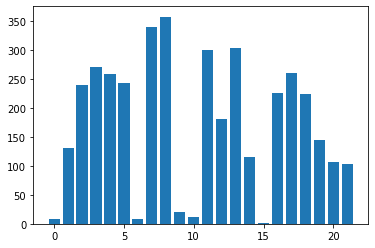

In [37]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [38]:
baseball_df_wo_salary = baseball_df.drop(columns="salary")

In [39]:
# Get sorted list of features by column name and correlation.
sorted(zip(fs.scores_, baseball_df_wo_salary.columns), reverse=True)

[(357.2672708911857, 'rbi'),
 (339.04494915878774, 'hr'),
 (302.5347410846639, 'ibb'),
 (299.44829550112775, 'bb'),
 (270.1477657101384, 'r'),
 (259.54925425297216, 'g_idp'),
 (257.6462333942434, 'h'),
 (242.16090799419504, 'double'),
 (239.52299661546292, 'ab'),
 (226.19767017247705, 'sf'),
 (223.498820307598, 'single'),
 (181.28922612760132, 'so'),
 (143.72725951909823, 'slg %'),
 (130.91469490228806, 'g'),
 (115.80768957487179, 'hbp'),
 (107.3655432945166, 'obp'),
 (103.58596093181562, 'batting avg'),
 (19.626015951338758, 'sb'),
 (12.190267772267616, 'cs'),
 (8.853085473010035, 'triple'),
 (7.648738442609114, 'year'),
 (1.607499639619893, 'sh')]

In [40]:
# Create 2nd version for testing.
baseball_df_2 = baseball_df
baseball_df_2

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg
0,2009,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,0.000000,0.000000,0.000000
1,2009,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073
2,2009,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,0.000000,0.000000,0.000000
3,2009,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,0.000000,0.000000,0.000000
4,2009,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,2014,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000
4801,2014,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818
4802,2014,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374
4803,2014,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930


In [41]:
# Create function to bucket years. 2009 = 0, 2010 = 1, etc.
def changeYear(year):
    if year == 2009:
        return 0
    elif year == 2010:
        return 1
    elif year == 2011:
        return 2
    elif year == 2012:
        return 3
    elif year == 2013:
        return 4
    elif year == 2014:
        return 5
    else:
        return 6

In [42]:
baseball_df_2["year"] = baseball_df_2["year"].apply(changeYear)
baseball_df_2

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg
0,0,73,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,419000,0.0,0.000000,0.000000,0.000000
1,0,152,563.0,96.0,165.0,29.0,3.0,15.0,103.0,30.0,8.0,94.0,113.0,7.0,1.0,0.0,9.0,15.0,5000000,118.0,0.435169,0.389805,0.293073
2,0,37,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,414800,0.0,0.000000,0.000000,0.000000
3,0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,400000,0.0,0.000000,0.000000,0.000000
4,0,74,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3500000,1.0,0.500000,0.500000,0.500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4800,5,68,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4500000,0.0,0.000000,0.000000,0.000000
4801,5,32,55.0,3.0,10.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,21.0,0.0,0.0,9.0,1.0,0.0,7500000,9.0,0.200000,0.206897,0.181818
4802,5,61,214.0,26.0,60.0,19.0,1.0,5.0,38.0,0.0,0.0,22.0,37.0,0.0,0.0,0.0,4.0,6.0,14000000,35.0,0.448598,0.341667,0.280374
4803,5,146,570.0,83.0,155.0,34.0,3.0,10.0,52.0,10.0,5.0,75.0,84.0,4.0,1.0,2.0,6.0,8.0,7000000,108.0,0.394737,0.354294,0.271930


In [43]:
baseball_df_2.describe()

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg
count,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4793.00000,4793.000000,4793.000000,4793.000000,4793.000000,4793.000000,4.793000e+03,4793.000000,4793.000000,4793.000000,4793.000000
mean,2.504277,69.017317,174.730023,22.372209,45.082620,8.960776,0.901314,5.101398,21.499061,3.122470,1.171083,16.320885,36.64323,1.258502,1.678489,1.497809,1.377843,3.920926,3.541924e+06,30.119132,0.230622,0.198084,0.153561
std,1.698359,47.088875,207.287199,29.634741,57.431681,11.930347,1.831276,8.374487,29.388446,7.186595,2.346263,22.559190,43.36633,2.899136,2.936997,2.721806,2.130583,5.536362,4.739080e+06,38.404487,0.200156,0.163383,0.131466
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,1.000000,31.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,4.950000e+05,0.000000,0.000000,0.000000,0.000000
50%,3.000000,61.000000,60.000000,4.000000,10.000000,2.000000,0.000000,0.000000,4.000000,0.000000,0.000000,3.000000,19.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.250000e+06,7.000000,0.272727,0.255952,0.196970
75%,4.000000,107.000000,336.000000,41.000000,85.000000,16.000000,1.000000,7.000000,38.000000,3.000000,1.000000,28.000000,63.00000,1.000000,2.000000,2.000000,2.000000,7.000000,4.775000e+06,56.000000,0.398649,0.325228,0.258065
max,5.000000,162.000000,684.000000,136.000000,225.000000,56.000000,16.000000,54.000000,141.000000,70.000000,23.000000,135.000000,223.00000,44.000000,26.000000,20.000000,12.000000,32.000000,3.300000e+07,179.000000,2.000000,1.000000,1.000000


In [44]:
# Get rid of any players who have no at-bats (most likely pitchers)
baseball_df_2 = baseball_df_2[baseball_df_2.ab > 0]

In [45]:
# Check updated values
baseball_df_2.describe()

,year,g,ab,r,h,double,triple,hr,rbi,sb,cs,bb,so,ibb,hbp,sh,sf,g_idp,salary,single,slg %,obp,batting avg
count,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3720.000000,3.720000e+03,3720.000000,3720.000000,3720.000000,3720.000000
mean,2.498387,76.908333,225.129301,28.823656,58.086290,11.545430,1.161290,6.572849,27.700000,4.023118,1.508871,21.024731,47.212634,1.621505,2.162634,1.925000,1.775269,5.051882,3.953252e+06,38.806720,0.297142,0.251456,0.197854
std,1.706479,49.049524,209.799029,30.751099,59.114368,12.391528,2.004782,8.982883,30.676732,7.932459,2.565816,23.598368,43.864494,3.200190,3.172914,2.953893,2.267896,5.812037,5.125917e+06,39.537505,0.178464,0.133987,0.116206
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000e+05,0.000000,0.000000,0.000000,0.000000
25%,1.000000,32.000000,26.000000,1.000000,3.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.980000e+05,2.000000,0.166667,0.187328,0.140000
50%,3.000000,69.000000,167.000000,18.000000,39.000000,7.000000,0.000000,2.000000,16.000000,0.000000,0.000000,13.000000,35.000000,0.000000,1.000000,1.000000,1.000000,3.000000,1.500000e+06,26.000000,0.345634,0.295179,0.232233
75%,4.000000,123.250000,410.000000,51.000000,107.000000,20.000000,2.000000,10.000000,48.000000,4.000000,2.000000,35.000000,77.000000,2.000000,3.000000,3.000000,3.000000,8.000000,5.500000e+06,69.000000,0.419133,0.333982,0.268730
max,5.000000,162.000000,684.000000,136.000000,225.000000,56.000000,16.000000,54.000000,141.000000,70.000000,23.000000,135.000000,223.000000,44.000000,26.000000,20.000000,12.000000,32.000000,3.300000e+07,179.000000,2.000000,1.000000,1.000000


In [46]:
# Test again with updated information.
X = baseball_df_2.drop(columns="salary").values
y = baseball_df_2["salary"].values
print("Shape: ", X.shape, y.shape)

Shape:  (3720, 22) (3720,)


In [47]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=12)

In [48]:
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [49]:
#import the model of our choosing
model = LinearRegression()

In [50]:
# Fit the model to the training data. 
model.fit(X_train_scaled, y_train)

LinearRegression()

In [51]:
# Call the `score()` method on the model to show the R2 score
model.score(X_test_scaled, y_test)

0.14285449515629645

In [52]:
print(f"Training Data Score: {model.score(X_train_scaled, y_train)}")
print(f"Testing Data Score: {model.score(X_test_scaled, y_test)}")

Training Data Score: 0.1599160570773802
Testing Data Score: 0.14285449515629645


Feature 0: 10.151344
Feature 1: 53.163489
Feature 2: 116.640082
Feature 3: 139.049375
Feature 4: 133.009308
Feature 5: 127.870297
Feature 6: 0.008160
Feature 7: 201.027352
Feature 8: 200.646998
Feature 9: 2.394775
Feature 10: 0.435171
Feature 11: 155.979520
Feature 12: 73.441893
Feature 13: 225.591528
Feature 14: 46.848407
Feature 15: 2.035586
Feature 16: 108.950409
Feature 17: 137.500550
Feature 18: 110.079192
Feature 19: 44.547743
Feature 20: 28.734655
Feature 21: 23.331032


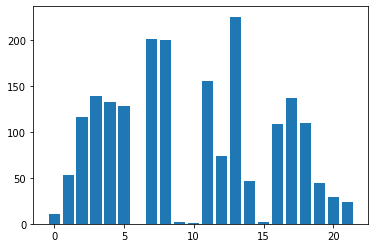

In [53]:
# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
pyplot.bar([i for i in range(len(fs.scores_))], fs.scores_)
pyplot.show()

In [54]:
baseball_df2_wo_salary = baseball_df_2.drop(columns="salary")

In [55]:
sorted(zip(fs.scores_, baseball_df2_wo_salary.columns), reverse=True)

[(225.59152826736087, 'ibb'),
 (201.02735150359632, 'hr'),
 (200.64699794573042, 'rbi'),
 (155.97952012506903, 'bb'),
 (139.04937538444952, 'r'),
 (137.5005496536519, 'g_idp'),
 (133.0093077232852, 'h'),
 (127.87029695984481, 'double'),
 (116.64008245766475, 'ab'),
 (110.07919151545836, 'single'),
 (108.95040881369057, 'sf'),
 (73.44189265461172, 'so'),
 (53.16348869320906, 'g'),
 (46.848406554009955, 'hbp'),
 (44.547743355289946, 'slg %'),
 (28.734654502025528, 'obp'),
 (23.331031792974393, 'batting avg'),
 (10.15134411268441, 'year'),
 (2.394775372501989, 'sb'),
 (2.0355862742122177, 'sh'),
 (0.4351710989552447, 'cs'),
 (0.008160413498464225, 'triple')]